# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install emoji==1.7
import emoji #
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Variables globales

In [7]:
DATASETS_NAME = {
    'MISOCORPUS_2020_TRAIN': 'misocorpus2020_train.csv',
    'MISOCORPUS_2020_VAL': 'misocorpus2020_val.csv',
    'MISOCORPUS_2020_TEST': 'misocorpus2020_test.csv',
}

DATASETS_DELIMITERS = {
    'MISOCORPUS_2020': ',',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### MISOCORPUS 2020

In [8]:
df_misocorpus_train = pd.read_csv ( DATASETS_NAME['MISOCORPUS_2020_TRAIN'],
        skiprows=1,
        header=None,
        names = ["tweet", "label"],
        delimiter=DATASETS_DELIMITERS['MISOCORPUS_2020'])

----------------------------

## Análisis datos



-----------------------------------------------

### Vistazo general a los datos

-----------------------------------------------


In [9]:
df_misocorpus_train.head()

,tweet,label
0,@twominbae cállate puta,1
1,@Josumovic Puta Greta,1
2,@monasterioR @julia_otero Eres patética,1
3,@GretaThunberg Loca del coño,1
4,@GretaThunberg cerda,1


In [10]:
df_misocorpus_train.head()

,tweet,label
0,@twominbae cállate puta,1
1,@Josumovic Puta Greta,1
2,@monasterioR @julia_otero Eres patética,1
3,@GretaThunberg Loca del coño,1
4,@GretaThunberg cerda,1


In [11]:
#Valores unicos
df_misocorpus_train.nunique()

,0
tweet,5034
label,2



-----------------------------------------------

### Proporciones

-----------------------------------------------


In [12]:
print("Proporcion en la columna 'label':")
df_misocorpus_train["label"].value_counts(normalize=True) * 100

Proporcion en la columna 'label':


,proportion
label,
0,55.562177
1,44.437823



-----------------------------------------------

### Longitud de los textos

-----------------------------------------------


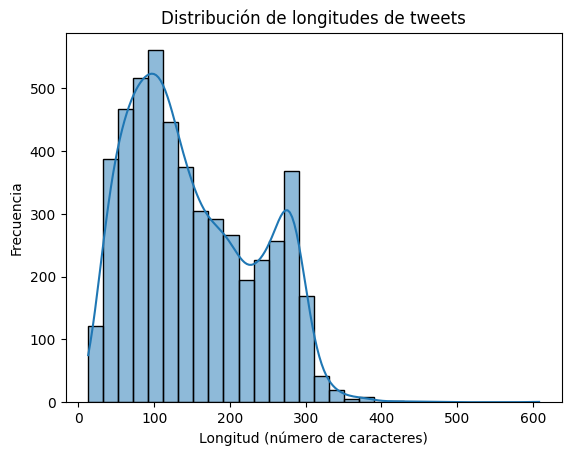

In [13]:
df_misocorpus_train["text_length"] = df_misocorpus_train["tweet"].apply(len)

sns.histplot(df_misocorpus_train["text_length"], bins=30, kde=True)
plt.title("Distribución de longitudes de tweets")
plt.xlabel("Longitud (número de caracteres)")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
# Longitud máxima y mínima
print("Longitud máxima: ", max(df_misocorpus_train["text_length"]))
print("Longitud mínima: ", min(df_misocorpus_train["text_length"]))

Longitud máxima:  608
Longitud mínima:  13



-----------------------------------------------

### Palabras más frecuentes

-----------------------------------------------


In [15]:
# lista de palabras/signos puntuacion que no se tendran en cuenta (se añaden los relacionados con links)
stop_words = set(stopwords.words('spanish') + list(string.punctuation) + ['http', 'https', 't.co', '//t.co/', '``', '”', '“' ])

tweets = " ".join(df_misocorpus_train["tweet"])
words = word_tokenize(tweets.lower())

words_filtered = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered)

print("Las 25 palabras más comunes y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes y su núm de apariciones:


[('greta', 1077),
 ('puta', 914),
 ("''", 670),
 ('si', 632),
 ('...', 630),
 ('feminazi', 571),
 ('feminazis', 548),
 ('thunberg', 485),
 ('arandina', 432),
 ('q', 343),
 ('lafallaras', 336),
 ('ser', 333),
 ('años', 323),
 ('inesarrimadas', 297),
 ('loca', 262),
 ('fregar', 228),
 ('gretathunberg', 224),
 ('mocosa', 212),
 ('mujeres', 211),
 ('hombres', 210),
 ('feminismo', 207),
 ('mujer', 204),
 ('caso', 202),
 ('mierda', 180),
 ('bolsonaro', 179)]

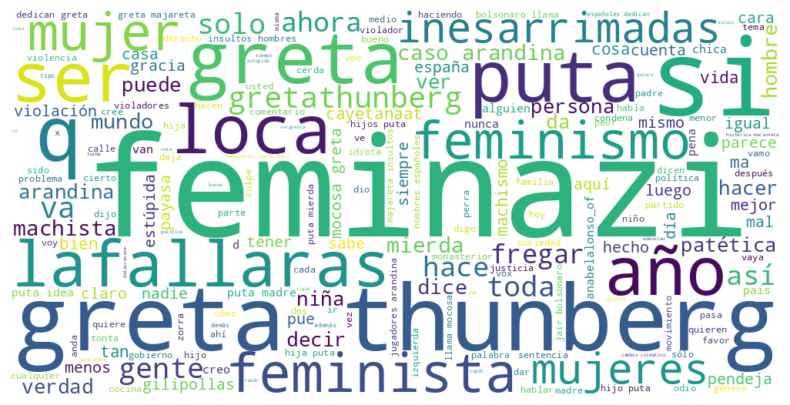

In [16]:
# Nube de palabras de las palabras más comunes

#eliminamos urls
words_filtered = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# Palabras más comunes en los tweets de misogynous

misogynous_texts = " ".join(df_misocorpus_train[df_misocorpus_train["label"] == 1]["tweet"])
words = word_tokenize(misogynous_texts.lower())

words_filtered_misogynous_texts = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered_misogynous_texts)

print("Las 25 palabras más comunes en textos misogynous y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes en textos misogynous y su núm de apariciones:


[('feminazis', 468),
 ('puta', 379),
 ('feminazi', 375),
 ('greta', 352),
 ('...', 315),
 ('lafallaras', 244),
 ('si', 239),
 ('inesarrimadas', 226),
 ('loca', 196),
 ('q', 176),
 ('ser', 160),
 ('patética', 151),
 ("''", 142),
 ('payasa', 131),
 ('gretathunberg', 127),
 ('mierda', 96),
 ('mujer', 92),
 ('cayetanaat', 91),
 ('hija', 90),
 ('solo', 82),
 ('mujeres', 76),
 ('..', 75),
 ('ver', 70),
 ('pendeja', 66),
 ('monasterior', 65)]

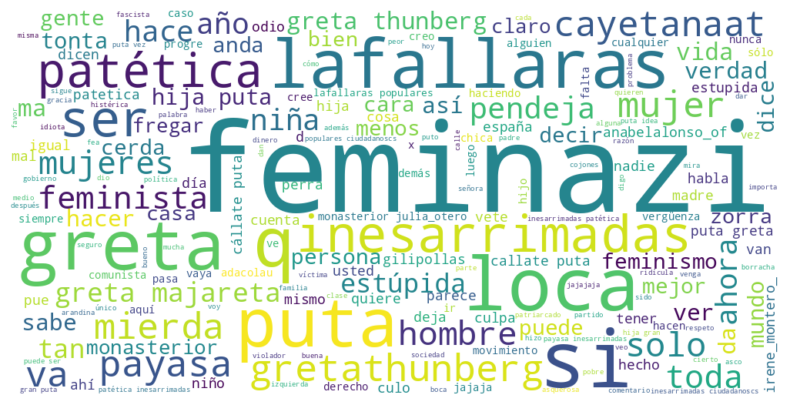

In [18]:
# Nube de palabras de las palabras más comunes en textos de misogynous

#eliminamos urls
words_filtered_misogynous_texts = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered_misogynous_texts))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered_misogynous_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


-----------------------------------------------

### Hashtags

-----------------------------------------------


In [19]:
df_misocorpus_train["hashtags"] = df_misocorpus_train["tweet"].apply(lambda x: re.findall(r"#(\w+)", x))
list_misocorpus_hashtags = [hashtag for hashtags in df_misocorpus_train["hashtags"] for hashtag in hashtags]

hashtag_counts = Counter(list_misocorpus_hashtags)

print("Los 15 hashtags más comunes y su núm de apariciones:")
hashtag_counts.most_common(15)

Los 15 hashtags más comunes y su núm de apariciones:


[('Arandina', 48),
 ('COP25', 31),
 ('Feminazi', 23),
 ('Feminazis', 19),
 ('Brasil', 19),
 ('GretaThunberg', 15),
 ('MarchaPorElClima', 14),
 ('LoMásLeído', 11),
 ('Internacional', 10),
 ('arandina', 9),
 ('Bolsonaro', 9),
 ('Mundo', 8),
 ('Greta', 8),
 ('Feministas', 7),
 ('feminismo', 7)]

In [20]:
print(f"Hay {len(list_misocorpus_hashtags)} hashtags en los {len(df_misocorpus_train.index)} datos")
for i in df_misocorpus_train["hashtags"]:
    if (len(i)>0):
        print(i)

Hay 927 hashtags en los 5034 datos
['dolar']
['FEMINAZIS', 'PROMUERTE', 'GeorgeSoros', 'ippf', 'ONU', 'CIDH']
['Feminazi']
['Sarcasm']
['Feminazis']
['izquierdanunca']
['Arandina']
['Manresa', 'Feminismo', 'Comunismo', 'Mira', 'DenunciaFalsa']
['TodAsSomosLaResistencia']
['cinicas']
['Feminazis']
['Feminazis', 'shhh', 'preciosa']
['arandina', 'votavox']
['Arandina']
['twitter', 'Feminazis', 'politicos', '23Dic', 'twitternoesreddeodio']
['InmadurasLerdasyJueces']
['Arandina']
['hombres', 'arandina', 'discriminaciondegenero', 'casoarandina']
['Miraflores', 'Feminazi']
['Júrenlo']
['Feminazi', 'silvita']
['Feminazis', 'Preciosa', 'Julissa', 'Quito', 'Ecuador']
['Feministas', 'Feminazi']
['ElVioladorEresTu', 'NiUnaMenos', 'FemiNazi', 'Feminismo']
['Feministas', 'Feminazi']
['Feminazi', 'feminismo', 'Feministas', 'feminist', 'ElVioladorEnTuCamino', 'ElVioladorErasTu']
['VamosAMorirTodos']
['Feminazi']
['ESPejo16D', 'DenunciaFalsa']
['Peru', 'Chile', 'Argentina', 'FemiNazis']
['AbreLosOjos']

In [21]:
# Hashtags en tweets misogynous
misogynous_hashtags = df_misocorpus_train[df_misocorpus_train["label"] == 1]["hashtags"].explode().dropna()
misogynous_hashtags_counts = Counter(misogynous_hashtags)

print("Los 15 hashtags más comunes en textos misogynous y su núm de apariciones:")
misogynous_hashtags_counts.most_common(15)

Los 15 hashtags más comunes en textos misogynous y su núm de apariciones:


[('Feminazi', 20),
 ('Feminazis', 17),
 ('Arandina', 7),
 ('Feministas', 6),
 ('feminazis', 6),
 ('FemiNazi', 4),
 ('ZORRA', 4),
 ('FEMINAZI', 3),
 ('feminazi', 3),
 ('FEMINAZIS', 2),
 ('PROMUERTE', 2),
 ('GeorgeSoros', 2),
 ('Feminismo', 2),
 ('DenunciaFalsa', 2),
 ('arandina', 2)]

In [22]:
# Todos los hashtags que aparecen en tweets misogynous
print(f"De los {len(list_misocorpus_hashtags)} hashtags, en tweets misogynous hay {len(misogynous_hashtags)}")
for i in misogynous_hashtags:
    if (len(i)>0):
        print(i)

De los 927 hashtags, en tweets misogynous hay 251
dolar
FEMINAZIS
PROMUERTE
GeorgeSoros
ippf
ONU
CIDH
Feminazi
Sarcasm
Feminazis
izquierdanunca
Arandina
Manresa
Feminismo
Comunismo
Mira
DenunciaFalsa
TodAsSomosLaResistencia
cinicas
Feminazis
Feminazis
shhh
preciosa
arandina
votavox
Arandina
twitter
Feminazis
politicos
23Dic
twitternoesreddeodio
InmadurasLerdasyJueces
Arandina
hombres
arandina
discriminaciondegenero
casoarandina
Miraflores
Feminazi
Júrenlo
Feminazi
silvita
Feminazis
Preciosa
Julissa
Quito
Ecuador
Feministas
Feminazi
ElVioladorEresTu
NiUnaMenos
FemiNazi
Feminismo
Feministas
Feminazi
Feminazi
feminismo
Feministas
feminist
ElVioladorEnTuCamino
ElVioladorErasTu
VamosAMorirTodos
Feminazi
ESPejo16D
DenunciaFalsa
Peru
Chile
Argentina
FemiNazis
AbreLosOjos
feminazis
feminazis
Feminazis
Feminazi
FEMINAZI
PROMUERTE
INDIGNANTE
feminazi
stopfeminazis
Feminazi
Melissa
asesinó
feminismo
Feminazi
TLHA2M
FEMINAZI
Feminazis
natgeo
Jueves
FemiNazi
ZORRA
Feminazi
lobba
Feminazis
LOBBA
ZOR


-----------------------------------------------

### Emojis

-----------------------------------------------


In [23]:
def extract_emojis(text):
    return [char for char in text if char in emoji.UNICODE_EMOJI["es"]]
df_misocorpus_train["emojis"] = df_misocorpus_train["tweet"].apply(extract_emojis)

In [24]:
# Emojis más comunes
all_emojis = [e for emojis in df_misocorpus_train["emojis"] for e in emojis]
emoji_counts = Counter(all_emojis)

print("Los 15 emojis más comunes y su núm de apariciones:")
emoji_counts.most_common(15)

Los 15 emojis más comunes y su núm de apariciones:


[('➡', 36),
 ('♀', 33),
 ('♂', 33),
 ('❤', 10),
 ('✍', 8),
 ('✌', 6),
 ('▶', 6),
 ('✊', 5),
 ('⬇', 5),
 ('⚡', 4),
 ('‼', 4),
 ('☺', 3),
 ('™', 3),
 ('✨', 3),
 ('✅', 3)]

In [25]:
# emojis en tweets misogynous
misogynous_emojis = df_misocorpus_train[df_misocorpus_train["label"] == 1]["emojis"].explode().dropna()
misogynous_emojis_counts = Counter(misogynous_emojis)

print("Los 15 emojis más comunes en textos misogynous y su núm de apariciones:")
misogynous_emojis_counts.most_common(15)

Los 15 emojis más comunes en textos misogynous y su núm de apariciones:


[('♂', 21),
 ('♀', 5),
 ('➡', 4),
 ('☺', 3),
 ('✌', 2),
 ('✊', 1),
 ('❗', 1),
 ('✖', 1),
 ('❤', 1),
 ('™', 1),
 ('®', 1),
 ('❣', 1)]

In [26]:
print(f"De {len(all_emojis)} emojis, {len(misogynous_emojis)} estan incluidos en tweets misogynous")

De 185 emojis, 42 estan incluidos en tweets misogynous


--------------------------------------------

In [1]:
! pip install "matplotlib<3.8"
! git clone https://github.com/ryanjgallagher/shifterator.git
! pip install -e ./shifterator/
import shifterator as sh
import matplotlib.pyplot as plt

fatal: destination path 'shifterator' already exists and is not an empty directory.
Obtaining file:///content/shifterator
  Preparing metadata (setup.py) ... done
  Attempting uninstall: shifterator
    Found existing installation: shifterator 0.2.0
    Uninstalling shifterator-0.2.0:
      Successfully uninstalled shifterator-0.2.0
  Running setup.py develop for shifterator


/content/shifterator/shifterator/plotting.py:703: SyntaxWarning: invalid escape sequence '\s'
  plot_params["cumulative_xlabel"] = "$\sum | \delta \Phi_{\\tau} |$"
/content/shifterator/shifterator/plotting.py:711: SyntaxWarning: invalid escape sequence '\s'
  plot_params["cumulative_xlabel"] = "$\sum \delta \Phi_{\\tau}$"


[]

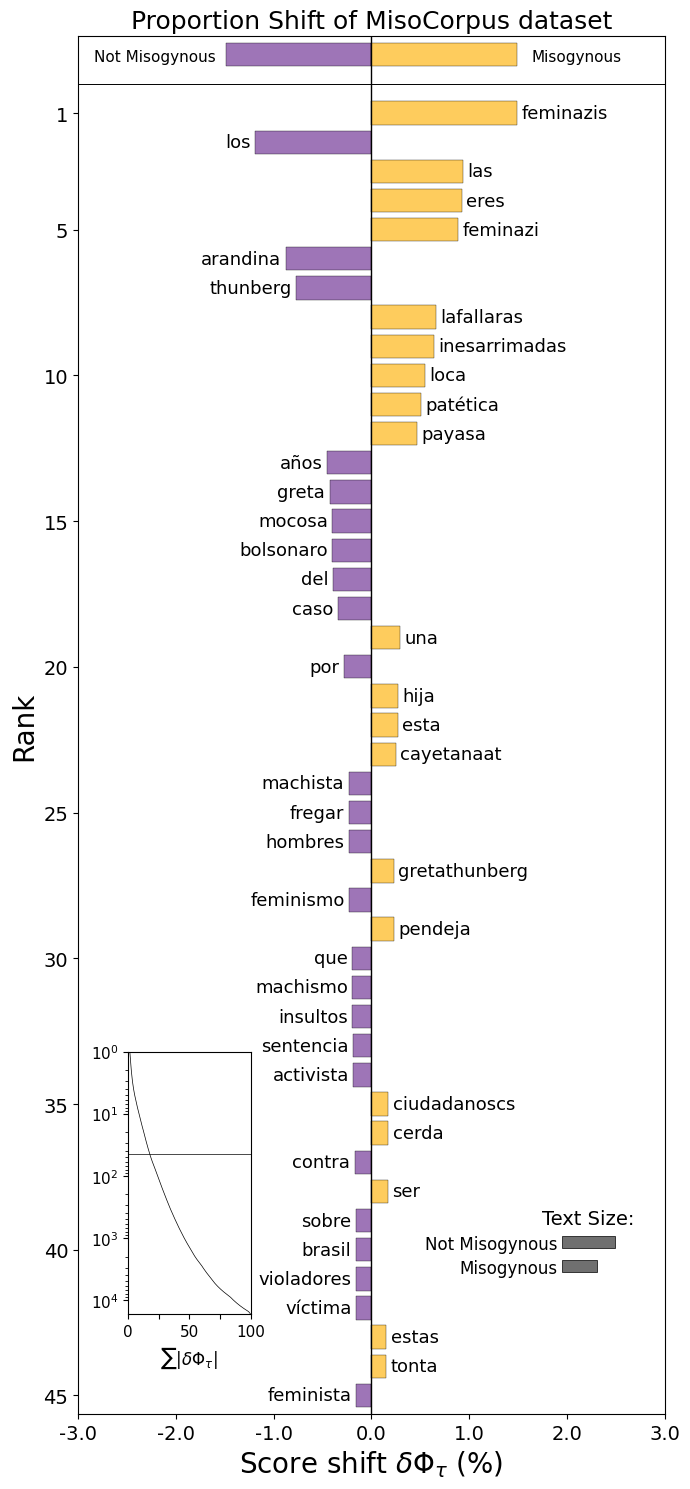

In [41]:
url_pattern = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)"
    r"(?:\w{1,}\.{1}){1,5}"
    r"(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm)"
    r"(?:\/[a-zA-Z0-9]{1,})*)"
)

def preprocess_tweets_no_stopwords(tweets, url_pattern):
    text = " ".join(tweets).lower()

    text = url_pattern.sub("", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and len(w) > 2]
    return tokens

tweets_label_0 = df_misocorpus_train[df_misocorpus_train["label"] == 0]["tweet"]
tweets_label_1 = df_misocorpus_train[df_misocorpus_train["label"] == 1]["tweet"]

words_0 = preprocess_tweets_no_stopwords(tweets_label_0, url_pattern)
words_1 = preprocess_tweets_no_stopwords(tweets_label_1, url_pattern)

freq_0 = Counter(words_0)
freq_1 = Counter(words_1)

proportion_shift = sh.ProportionShift(type2freq_1=freq_0,
                                      type2freq_2=freq_1)
fig = proportion_shift.get_shift_graph(
    system_names=['Not Misogynous', 'Misogynous'],
    title='Proportion Shift of MisoCorpus dataset',
    show_plot=False,
    top_n = 45
)

fig.text(
    0.13, 0.98,
    f"Not Misogynous",
    ha="center",
    va="bottom",
    fontsize=11,
    transform=fig.transAxes,
)

fig.text(
    0.85, 0.98,
    f"Misogynous",
    ha="center",
    va="bottom",
    fontsize=11,
    transform=fig.transAxes,
)
fig.plot()